In [ ]:
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=5bb7b03f407d55ef15730b3c6545a625761116b184b4ffc8aa5d15012aa6c27c
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Authentication
consumerKey = "jTwVlY57DgR1QfrKWoQ6vRFuf"
consumerSecret = "7lGVAytToB5MMGKiJgYJcP6GQX3hZqvWKZEGkhVJkvvsbroA89"
accessToken = "1507626884175376392-T0HKbCl0FN3su7FqkgdgKX3j08DAKL"
accessTokenSecret = "8uiQAANVWZkn0yiPYM6pWN1nBCuNyvMiPfYgA3BpAJ3AW"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:

#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search:")
noOfTweet = int(input ("Please enter how many tweets to analyze:"))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
 
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
 
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:ipl2023
Please enter how many tweets to analyze:2500


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number:" ,len(tweet_list))
print("positive number:",len(positive_list))
print("negative number:" , len(negative_list))
print("neutral number:" ,len(neutral_list))

total number: 2500
positive number: 1006
negative number: 196
neutral number: 1298


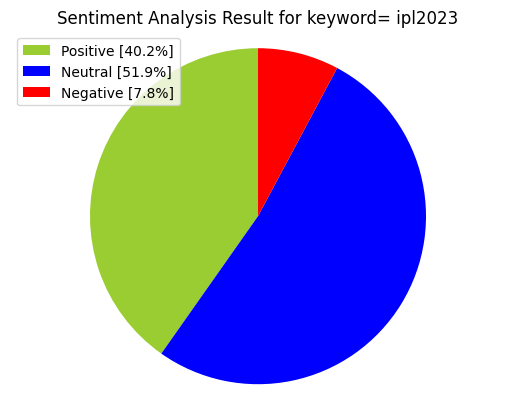

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

,0
0,RT @mipaltan: 𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका who keeps ask...
1,Virat Kohli signs an autograph for a young fan...
2,RT @mipaltan: 𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका who keeps ask...
3,IPL 2023: RR కెప్టెన్ సరికొత్త రికార్డు.. టాప్...
4,RT @mipaltan: 𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका who keeps ask...
...,...
2495,RT @Sportskeeda: India's Golden Top 3 🌟🇮🇳\n\n#...
2496,RT @RCBTweets: ಇದೇ ಹುಮ್ಮಸ್ಸಿನೊಂದಿಗೆ ಮುಂದೆ ಸಾಗೋ...
2497,"RT @TrendsDhoni: Mark Wood, Trent Boult, Kagis..."
2498,RT @HTSportsNews: Savage from Samson!\n\n#Sanj...


In [ ]:
#Cleaning Tweets to Analyse Sentiment
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @mipaltan: 𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका who keeps ask...,𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका ...
1,Virat Kohli signs an autograph for a young fan...,...
3,IPL 2023: RR కెప్టెన్ సరికొత్త రికార్డు.. టాప్...,: కెప్టెన్ సరికొత్త రికార్డు.. టాప్...
5,Finally KK…. KIRAN IS HEREEEE 🤩💜\n\n#AmiKKR #T...,…. 🤩💜\n\n# # ...
6,RT @CSKFansArmy: Reaction of mark wood sums it...,🔥\n\n# ...
7,RT @VibhuBhola: ❗️❗️IPL 2023 Biggest Virat Koh...,❗️❗️ ❗️❗️...
9,"RT @CricSubhayan: I think, RCB fans will overp...",", ..."
11,"RT @TheDhoniEra: ""The noise when MS Dhoni came...",""" ..."
13,RT @VibhuBhola: 🚨🚨🚨 IPL Contest Is Back 🚨🚨🚨\n\...,🚨🚨🚨 🚨🚨🚨\n\n & ; ...
14,RT @supergillies: * சேப்பாக் சூப்பர் கில்லீஸ் ...,* சேப்பாக் சூப்பர் கில்லீஸ் அணி நடத்திய போட்ட...


In [ ]:
#Sentiment Analyse
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
   tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
   tw_list.loc[index, 'sentiment'] = "positive"
 else:
   tw_list.loc[index, 'sentiment'] = "neutral"
   tw_list.loc[index, 'neg'] = neg
   tw_list.loc[index, 'neu'] = neu
   tw_list.loc[index, 'pos'] = pos
   tw_list.loc[index, 'compound'] = comp
   tw_list.head(10)

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,916,99.78
positive,2,0.22


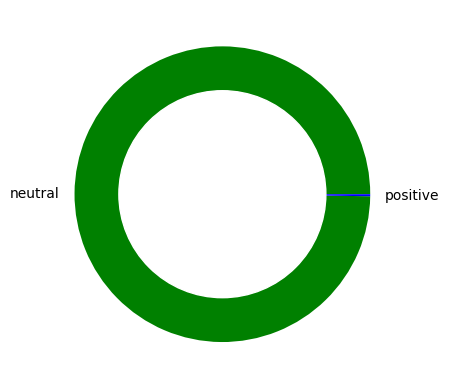

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
neutral,114.15
positive,112.00


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
neutral,9.47
positive,9.00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @mipaltan: 𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका who keeps ask...,𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,119,11,𝙏𝙝𝙖𝙩 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜 काका ...,"[, 𝙏𝙝𝙖𝙩, 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜, क, क, ]","[, 𝙏𝙝𝙖𝙩, 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜, क, क, ]","[, 𝙏𝙝𝙖𝙩, 𝙖𝙣𝙣𝙤𝙮𝙞𝙣𝙜, क, क, ]"
1,Virat Kohli signs an autograph for a young fan...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,133,11,...,"[, ]","[, ]","[, ]"
3,IPL 2023: RR కెప్టెన్ సరికొత్త రికార్డు.. టాప్...,: కెప్టెన్ సరికొత్త రికార్డు.. టాప్...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,135,15,కెప్టెన్ సరికొత్త రికార్డు టాప్‌ స...,"[, క, ప, ట, న, సర, క, త, త, ర, క, ర, డ, ట, ప, ...","[, క, ప, ట, న, సర, క, త, త, ర, క, ర, డ, ట, ప, ...","[, క, ప, ట, న, సర, క, త, త, ర, క, ర, డ, ట, ప, ..."
5,Finally KK…. KIRAN IS HEREEEE 🤩💜\n\n#AmiKKR #T...,…. 🤩💜\n\n# # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,87,8,… 🤩💜\n\n ...,"[, ]","[, ]","[, ]"
6,RT @CSKFansArmy: Reaction of mark wood sums it...,🔥\n\n# ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,84,6,🔥\n\n ...,"[, ]","[, ]","[, ]"
